# <center> KFZ Antriebe LU </center>
<center> Marcus Steinbacher </center>
<center> Gruppe 3</center>

## Aufgabenstellung
### Einleitung
### Zweck der Messung

## Prüfstandsaufbau

## Messdurchführung
### Aufgenommene Messungen
### Mess- und Einstellprozedere
### Randbedingungen

## Ergebnisse

In [30]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import fixed, interactive_output
import ipywidgets as widgets
import copy

sns.set()

Zur Auswertung wurden die Daten der fünf Messreihen in eine gemeinsame Tabelle überführt, sodass jede Zeile einem einzelnen Messpunkt mit folgenden features darstellt: <br>
`Drehzahl` `Kurbelwinkel` `P_ZYL1` `P_ZYL2` `P_ZYL3` `Drehmoment` `Absolutverbrauch` `Angesaugte Luftmasse` `O2 roh` `CO roh` `CO2 roh` `NOx roh` `HC3 roh` `Lambda` `Temp Kühlm.E` `Temp Kühlm.A` `Temp Oel` `Temp Ansaugl. nach Verd.` `Temp Ansaugluft Saugrohr` `Temp Abgas vor Turbine` `P Saugrohr` `P Abg. vor Turb.` `ZZP` `Cycle` `Volumen` `P_ZYLm`.

In [2]:
df = pd.read_csv("cyl_raw.csv")
df.head()

,Drehzahl,Kurbelwinkel,P_ZYL1,P_ZYL2,P_ZYL3,Drehmoment,Absolutverbrauch,Angesaugte Luftmasse,O2 roh,CO roh,...,Lambda,Temp Kühlm.E,Temp Kühlm.A,Temp Oel,Temp Ansaugl. nach Verd.,Temp Ansaugluft Saugrohr,Temp Abgas vor Turbine,P Saugrohr,P Abg. vor Turb.,ZZP
0,1600,-360,1.043,1.040,1.014,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,-8
1,1600,-359,1.048,1.037,1.011,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,-8
2,1600,-358,1.053,1.045,1.024,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,-8
3,1600,-357,1.061,1.054,1.028,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,-8
4,1600,-356,1.067,1.055,1.033,89.6,3.82,54.6789,0.807,0.71,...,0.999158,84,88,76.75,53,30.73,674.18,1077,1194.77,-8


Um in der weiteren Auswertung die Messkurve der einzelnen Takte untersuchen zu können, wird das feature `Cycle` eingeführt, indem das Gesamtintervall -360° v.OT bis 360° n.OT in vier 180° Subintervalle zerlegt wird. Dabei erfolgt folgende zuordnung: <br>
<br>
$$ \text{Ansaugen: } 0 \text{ für } \phi \in -360° v.OT , -180° v.OT $$
$$ \text{Verdichten: } 1 \text{ für } \phi \in -180° v.OT , -0° v.OT $$
$$ \text{Arbeiten: } 2 \text{ für } \phi \in +0° n.OT , 180° n.OT $$
$$ \text{Ausstoßen: } 3 \text{ für } \phi \in 180° n.OT , 360° n.OT $$

In [3]:
# cycle identifizieren
# 180°: Ansaugen, 180°: Verdichten,...
d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
cycle = [0]*180 + [1]*180 + [2]*180 + [3]*180
cycles = cycle*len(df["Drehzahl"].unique())
df["Cycle"]  = cycles

Das `Volumen` in Abhängigkeit des Winkels $\phi$ berechnet sich folgendermaßen: <br>
$$
x(\phi) =
$$
$$
V(\phi) = \frac{}{}
$$
Daraus ergibt sich ein Hubvolumen $V_H$ von $V_H = V(180°) - V(0°) = (\frac{b}{2})^2 * \pi * h= 318090 mm³$ und ein Hubraum von $H = n_{zyl} * V_H = 954 ccm$.

Hubvolumen: 318089.3977686201 mm³
Hubram: 954.2681933058603 ccm


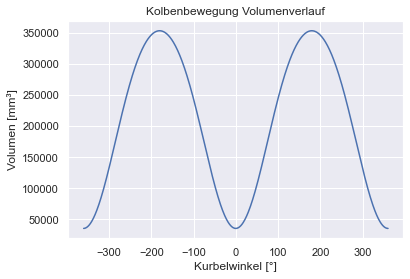

In [4]:
# volumen in abh. des winkels berechnen
# Konstanten
RPMs = df["Drehzahl"].unique()
Vh = (73/2)**2 * m.pi * 76 #mm³

def volume(winkel, h=76,l=135,dea=-0.6,s=0,eps=10,b=73):
    """
    params:
        winkel: Kurbelwinkel [°]
        h: Kolbenhub [mm]
        l: Pleuellänge [mm]
        dea: Deachsierung [mm]
        s: Schränkung [mm]
        eps: Verdichtungsverhältnis [1]
        b: Bohrung [mm]
    returns: 
        Volumen in Abh. von winkel [mm**3]
    """
    v_hub = (b/2)**2 * m.pi * h #mm**3
    x = h/2 * (1 - m.cos(m.radians(winkel))) + l * (1 - m.sqrt(1 - ((h*m.sin(m.radians(winkel)))/(2*l) - (dea-s)/l)**2))
    v = v_hub/(eps-1) + b**2 *(m.pi/4) * x
    return v

df["Volumen"] = df["Kurbelwinkel"].map(volume)

x = np.linspace(-360,360,720)
y = list(map(lambda w:volume(w),x))

plt.xlabel("Kurbelwinkel [°]")
plt.ylabel("Volumen [mm³]")
plt.title("Kolbenbewegung Volumenverlauf")
plt.plot(x,y)
print(f"Hubvolumen: {volume(180)-volume(0)} mm³")
print(f"Hubram: {(volume(180)-volume(0))*3*10**(-3)} ccm")

Da es sich um eine 3-Zylinder Ottomotor handelt wird zunächst der mittlere Druck `P_ZYLm` für jeden Messpunkt als arithmetisches Mittel der Einzeldrücke in den jeweiligen Zylindern  gebildet: <br>
$$
p_{ZYLm} = \frac{\sum{p_{ZYL,i}}}{3}
$$

In [5]:
# Druck Mittelwert
df["P_ZYLm"] = df.loc[:,["P_ZYL1","P_ZYL2","P_ZYL3"]].mean(axis=1)
#df.head()

### Druckverlauf
Nachfolgende Abbildung zeigt den mit steigender `Drehzahl` bei Leistungskonstanter Fahrt zu erwartenden sinkenden mittleren Zylinderdruck `P_ZYLm` über dem `Kurbelwinkel`:

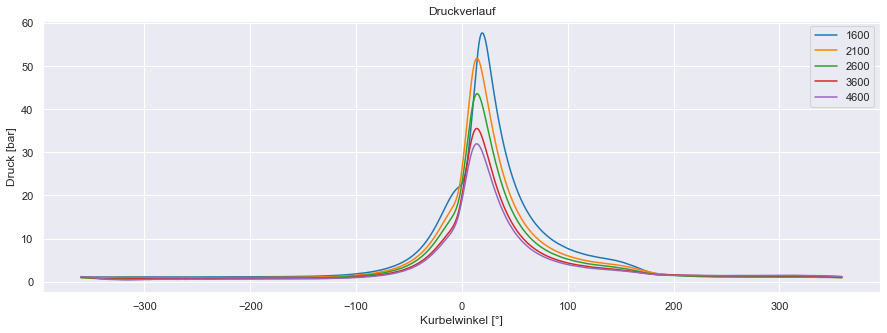

In [6]:
#Druckverlauf alle Drehzahlen plotten
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(data=df,x="Kurbelwinkel",y="P_ZYLm",hue="Drehzahl",palette="tab10",ax=ax)
ax.set_title("Druckverlauf")
ax.set_xlabel("Kurbelwinkel [°]")
ax.set_ylabel("Druck [bar]")
plt.legend()
plt.show()

#### Maximaldruck
Der Maximaldruck ist bei einer `Drehzahl` von 1600U/min beinahe doppelt so große wie bei der gemessenen Maximaldrehzahl 4600 U/min. Die Regressionsanalyse lässt einen linearen Trend erkennen.

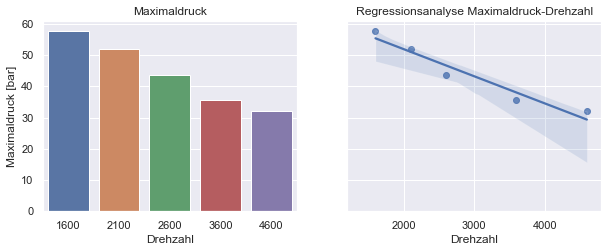

In [7]:
#bar  plot max druck
# verlauf max-druck über drehzahl (trendkurve)

df_max = df.groupby(by="Drehzahl",as_index=False).max()

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,3.5),sharey=True)

sns.barplot(data=df_max,x="Drehzahl",y="P_ZYLm",ax=axs[0])
axs[0].set_ylabel("Maximaldruck [bar]")
axs[0].set_title("Maximaldruck")
sns.regplot(data=df_max,x="Drehzahl",y="P_ZYLm",ax=axs[1],order=1)
axs[1].set_xlim(left=1200,right=4800)
axs[1].set_title("Regressionsanalyse Maximaldruck-Drehzahl")
axs[1].set_ylabel("")

plt.show()

#### Druckverlauf und Zündzeitpunkt
Eine genauere Untersuchung unter Einbeziehung des Zündzeitpunkts `ZZP`lässt eine Unstetigkeit des Druckverlaufs für 1600 U/min um den ZZP erkennen: 

In [29]:
#Druck verlauf über Winkel mit ZZP
def ZZP(rpm,log=False,ax=None,over="volume",vline=False,color="red"):
    '''
    params:
        rpm: Drehzahl in [1600,2100,2600,3600,4600]
        log: bool, True: y-Achse log skala
        ax: default: None, erstellt fig,ax. Sonst existiedendes plt.axes, um darauf zu plotten
        over: x-achse über der zu plotten ist in ["volume","angle"]
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ZZP = df_rpm["ZZP"].unique()[0]
    
    
    if not ax:
        fig,ax = plt.subplots()
        
    if over == "volume":
        x = volume(ZZP)
    elif over == "angle":
        x = ZZP
    
    if vline:
        ax.axvline(x=x,color=color,label="ZZP")
    else:
        ax.scatter(x,df_rpm[(df_rpm["Cycle"]==1) & (df_rpm["Kurbelwinkel"]==ZZP)]["P_ZYLm"],color=color,label="ZZP")

def p_angle(rpm,log=False,ax=None):
    '''
    params:
        rpm: Drehzahl
        ax: existierendes plt.axes object. falls None wird eines erstellt
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots()
    
    ax.plot(df_rpm["Kurbelwinkel"],df_rpm["P_ZYLm"])
    ax.set_xlabel("Kurbelwinkel [°]")
    ax.set_ylabel("Druck [bar]")
    ax.set_title(f"Druckverlauf {rpm} U/min")
    
    if log:
        ax.set_yscale("log")
        ax.set_ylabel("log Druck [bar]")

        
rpm_dropd = widgets.Dropdown(options = RPMs,value=2100,description="Drehzahl")

def plot1(rpm,**kwargs):
    fig, ax = plt.subplots(figsize=(14,5))
    p_angle(rpm,ax=ax)
    ZZP(rpm,ax=ax,over="angle")
    plt.legend()

out1 = interactive_output(plot1,{"rpm":rpm_dropd})
display(rpm_dropd,out1)

Dropdown(description='Drehzahl', index=1, options=(1600, 2100, 2600, 3600, 4600), value=2100)

Output()

TODO Deutung Unstetigkeit bei 1600 und ZZP <br>
### p-V-Diagramm
Bei genauerer Betrachtung des p-V- Diagramms zeigt sich für die Ladungswechselschleife, dass bei einer `Drehzahl` von 1600 U/min die Ansaug-Kurve über der Ausstoß-Kurve liegt. Bei steigender `Drehzahl` kehrt sich dieses Verhältnis um. <br>
**TODO** Begründung Turbo? Arbeit positiv bei steigender Drehzahl? <br>
Weiters lassen sich v.a. bei einer logarithmischen Skalierung des Drucks `P_ZYLm` auf der Ordinate bei steigenden Drehzahlen eine zunehmende Volatilität des Druckverlaufs im unteren Druckniveau - insbesondere der Ladungswechselschleife -erkennen. 

In [9]:
#p-V Diagramm mit Zyklen (Ansaugen, Kompression, ...)
def pV(rpm,log=False,ax=None):
    '''
    Plotted ein p-V-Digramm für die angegebene Drehzahl {rpm}
    params:
        rpm:
        log:
        ax:
    '''
    d = {0:"Ansaugen",1:"Verdichten",2:"Arbeiten",3:"Ausstossen"}
    df_rpm = df[df["Drehzahl"]==rpm]
    
    if not ax:
        fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
    for cyc in df_rpm["Cycle"].unique():
        df_rpm_cyc = df_rpm[df_rpm["Cycle"]==cyc]
        ax.plot(df_rpm_cyc["Volumen"],df_rpm_cyc["P_ZYLm"],label=d[cyc])

    ax.set_xlabel("Volumen [mm³]")
    ax.set_ylabel("Druck [bar]")
    if log:
        ax.set_yscale("log")
        ax.set_ylabel("log Druck [bar]")
    
    plt.title(f"p-V Diagramm {rpm} U/min")
    
    
log_checkb = widgets.Checkbox(value=True,description="log Skala")

def plot2(rpm,log=None,**kwargs):
    fig,ax = plt.subplots(figsize=(14,7))
    pV(rpm,log=log,ax=ax)
    ZZP(rpm,log=log,ax=ax)

    plt.legend()
    
out2 = interactive_output(plot2,{"rpm":rpm_dropd,"log":log_checkb})

display(widgets.HBox([rpm_dropd,log_checkb]),out2)

Output()

### Hochdruck- und Ladungswechselschleife
Zur Ermittlung des indizierten Mitteldrucks $p_{mi}$ ist es zunächst notwendig, die Hochdruck- und Ladungswechselschleifen im p-V-Diagramm zu berechnen. <br>
Der Vorgang soll am Beispiel des obigen p-V-Diagramms bei einer `Drehzahl` von 4600 U/min beschrieben werden:<br> 
Die Ladungswechselschleife (ND) ist nach unten von der Ansaugkurve (blau) begrenzt. Nach oben begrenzt sie das **Minimum** von Verdichtungskurve (orange) und Ausstoßverlauf (rot). <br>
Analoges gilt für die HD Schleife: Sie ist nach oben durch den Druckverlauf des Arbeitstaktes (grün) und nach unten durch das **Maximum** von Verdichtungs- und Arbeitskurve begrenzt. 

In [34]:
# Arbeit HD, ND Schleife
# HD -> cycle 2 - max(cycle1,cycle3)
# ND -> min(cycle3,cycle1) - cycle0
def HD(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Hochdruckschleife als Kombination der Drucklinien der einzelnen Zyklen folgenderweise:
    HD nach oben durch Arbeits-Druckverlauf (Cycle=2) begrenzt und nach unten durch das Maximum von Ausstoß- (Cycle=3) 
    und Verdichtungs-verlauf (Cycle=1).
    ND nach unten durch Ansaug-verlauf (Cycle=0) begrenzt und nach oben durch das Minimum von Ausstoß (3) und
    Verdichtungs-verlauf (1).
    
    params:
        rpm:
        log:
        ax:
        plot: default True. False falls nur die HD Arbeit zurückgegeben werden soll.
    returns:
        HD Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    HD = df_rpm[df_rpm["Cycle"]==2].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD.rename(columns={"P_ZYLm":"upper"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    HD_lower = [max(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    HD["lower"] = HD_lower
    
    if plot:
        if not ax:
            fig, ax = plt.subplots(1,1,figsize=(15,7.5))
    
        ax.plot(HD["Volumen"],HD["upper"],label="HD upper")
        ax.plot(HD["Volumen"],HD["lower"],label="HD lower")
        
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(HD["Volumen"],HD["lower"],HD["upper"],label="W_HD",alpha=0.5)
    
    w_upper = np.trapz(HD["upper"],x=HD["Volumen"]) #bar*mm³
    w_lower = np.trapz(HD["lower"],x=HD["Volumen"])
    return (w_upper - w_lower) #bar*mm³

def ND(rpm,log=False,ax=None,plot=True):
    '''
    Berechnet die Niederdruckschleife. Doc analog HD
    
    params:
        rpm:
        log:
        ax:
        plot:
    returns:
        ND Arbeit
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    ND = df_rpm[df_rpm["Cycle"]==0].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND.rename(columns={"P_ZYLm":"lower"},inplace=True)
    cyc1 = df_rpm[df_rpm["Cycle"]==1].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    cyc3 = df_rpm[df_rpm["Cycle"]==3].loc[:,["Volumen","P_ZYLm"]].sort_values(by="Volumen")
    ND_upper = [min(a,b) for a,b in zip(cyc1["P_ZYLm"].values,cyc3["P_ZYLm"].values)]
    ND["upper"] = ND_upper
    
    if plot:
        if not ax:
            fig,ax = plt.subplots()
            
        ax.plot(ND["Volumen"],ND["upper"],label="ND upper")
        ax.plot(ND["Volumen"],ND["lower"],label="ND lower")
        #ax.set_title(f"Hochdruckschleife {rpm} U/min")
        ax.set_xlabel("Volumen [mm³]")
        ax.set_ylabel("Druck [bar]")
        if log:
            plt.yscale("log")
            ax.set_ylabel("log Druck [bar]")
    
        ax.fill_between(ND["Volumen"],ND["lower"],ND["upper"],label="W_ND",alpha=0.5)
    
    w_upper = np.trapz(ND["upper"],x=ND["Volumen"]) #bar*mm³
    w_lower = np.trapz(ND["lower"],x=ND["Volumen"])
    return (w_upper - w_lower) #bar*mm³


def plot3(rpm,log=None,**kwargs):
    fig,ax = plt.subplots(figsize=(14,7))
    HD(rpm,log=log,ax=ax)
    ND(rpm,log=log,ax=ax)
    ZZP(rpm,log=log,ax=ax)
    plt.title(f"p-V Diagramm HD, ND bei {rpm} U/min")
    plt.legend()

rpm_dropd1 = widgets.Dropdown(options=RPMs,value=1600)

out3 = interactive_output(plot3,{"rpm":rpm_dropd1,"log":log_checkb})
display(widgets.HBox([rpm_dropd1,log_checkb]),out3)

Output()

### Indizierter Mitteldruck
Es zeigt sich, dass die Arbeit $W_{ND,1600}$ der ND Schleife bei **1600 U/min negativ** ist. Für größere Drehzahlen nimmt $W_{ND}$ positive Vorzeichen an.<br> 
Nachfolgende Abbildung zeigt den indizierten Mitteldruck $p_{mi,HD} = \frac{W_{HD}}{V_H}$ und $p_{mi,ND}=\frac{W_{ND}}{V_H}$ für verschiedene Drehzahlen sowie den resutierenden indizierten Mitteldruck $p_{mi} = p_{mi,HD} + p_{mi,ND}$. <br>
<br>
***Indizierte Mitteldruck aus HD und ND mittels Trapezregel***

,Drehzahl,pmiHD,pmiND,pmi
0,1600,12.029887,-0.018560,12.011327
1,2100,9.516066,0.206778,9.722844
2,2600,8.140450,0.353091,8.493540
3,3600,6.593034,0.469924,7.062959
4,4600,5.914980,0.597398,6.512377


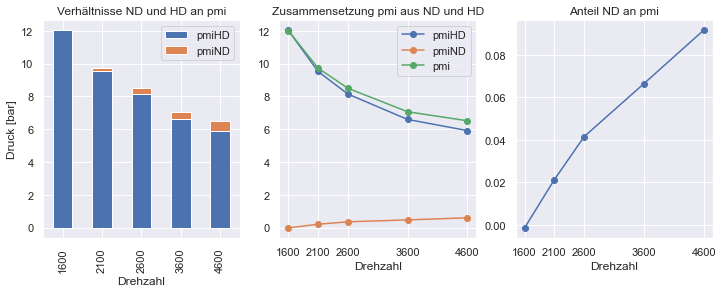

In [11]:
pmiHD = [HD(rpm,plot=False)/Vh for rpm in RPMs] #bar, integgration der oberen Begrenzung in return value von HD()
pmiND = [ND(rpm,plot=False)/Vh for rpm in RPMs] #bar, interation der unteren Berenzung ND()
df_pm = pd.DataFrame({"Drehzahl":RPMs,"pmiHD":pmiHD,"pmiND":pmiND})
df_pm["pmi"] = df_pm["pmiHD"]+df_pm["pmiND"]
fig,axs = plt.subplots(1,3,figsize=(12,4),sharey=False)

df_pm.loc[:,["Drehzahl","pmiHD","pmiND"]].plot(kind="bar",x="Drehzahl",stacked=True,ax=axs[0])
axs[0].set_ylabel("Druck [bar]")
axs[0].set_title("Verhältnisse ND und HD an pmi")

df_pm.plot(kind="line",x="Drehzahl",ax=axs[1],style=["-o"]*3)
axs[1].set_xticks(RPMs)
axs[1].set_title("Zusammensetzung pmi aus ND und HD")

axs[2].plot(df_pm["Drehzahl"],df_pm["pmiND"]/df_pm["pmi"],"-o")
axs[2].set_xticks(RPMs)
axs[2].set_xlabel("Drehzahl")
axs[2].set_title("Anteil ND an pmi")

def style_negative(v, props=''):
    return props if v < 0 else None
display(df_pm.style.applymap(style_negative, props='color:red;'))
plt.show()

Es ist zu erkennen, dass mit steigender Drehzahl der Anteil von $p_{mi,ND}$ an $p_{mi}$ zunimmt. <br>
<br>
***Zusatz: Indizierter Mitteldruck aus Riemann Summen $\frac{1}{Vh} \sum p_i*dV_i$***

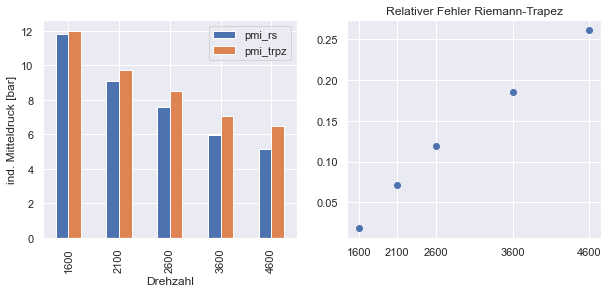

In [12]:
df["dV"] = df.loc[:,"Volumen"].diff()
df["pmi_rs"] = df["dV"]*df["P_ZYLm"]/Vh
df_pmi = df.groupby(by="Drehzahl",as_index=False).sum().loc[:,["Drehzahl","pmi_rs"]]
df_pmi.rename(columns={"pmi":"pmi_rs"},inplace=True)
df_pmi["pmi_trpz"] = df_pm["pmi"]
df_pmi["delta"] = abs((df_pmi["pmi_trpz"]-df_pmi["pmi_rs"])/df_pmi["pmi_rs"])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
df_pmi.iloc[:,:-1].plot(kind="bar",x="Drehzahl",ax=ax1)
plt.title("Relativer Fehler Riemann-Trapez")
ax1.set_ylabel("ind. Mitteldruck [bar]")
ax2.plot(df_pmi["Drehzahl"],df_pmi["delta"],"o")
ax2.set_xticks(RPMs)
plt.show()

### Effektiver Mittteldruck
Der effektive Mitteldruck $p_{me}$ errechnet sich aus den an der Welle bei den verschiedenen `Drehmomenten` abgenommenen Arbeit und dem gesamten Hubvolumen (Hubraum): <br>
$$
W_{me} = p_{me}* V_H \\
\frac{W_{me}}{V_H} = p_{me} \\
p_{me,rpm} = \frac{2*f*\pi*M_{rpm}}{V_H}
$$
Auf das Hubvolumen $V_h$ bezogen gilt mit $V_H = 3*V_h$:
$$
W_{me} = p_{me}* 3 *V_h \\
\frac{W_{me}}{V_h} = 3*p_{me} = p'_{me}
$$

In [13]:
def pme(rpm,f=2):
    M_rpm = df[df["Drehzahl"]==rpm]["Drehmoment"].unique()[0] #Nm
    return 3*(2*f*m.pi*M_rpm*10**(3)) / (Vh) #bar

df_pm["pme"] = [pme(rpm) for rpm in RPMs]
df_pm

,Drehzahl,pmiHD,pmiND,pmi,pme
0,1600,12.029887,-0.018560,12.011327,10.619154
1,2100,9.516066,0.206778,9.722844,8.094735
2,2600,8.140450,0.353091,8.493540,6.542158
3,3600,6.593034,0.469924,7.062959,4.716990
4,4600,5.914980,0.597398,6.512377,3.685890


### Reibmitteldruck
Der Reibmitteldruck berechnet mittels der Differenz von indiziertem Mitteldruck und effektivem Mitteldruck. <br>
$$p_{mr} = p_{mi} - p_{me}$$

,Drehzahl,pmiHD,pmiND,pmi,pme,pmr
0,1600,12.029887,-0.018560,12.011327,10.619154,1.392172
1,2100,9.516066,0.206778,9.722844,8.094735,1.628109
2,2600,8.140450,0.353091,8.493540,6.542158,1.951383
3,3600,6.593034,0.469924,7.062959,4.716990,2.345968
4,4600,5.914980,0.597398,6.512377,3.685890,2.826488


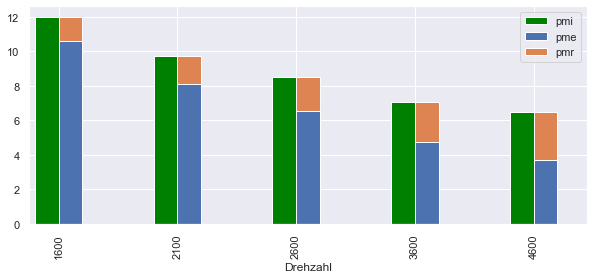

In [14]:
df_pm["pmr"] = df_pm["pmi"] - df_pm["pme"]

fig, ax = plt.subplots(figsize=(10,4))
df_pm.plot(kind="bar",x="Drehzahl",y="pmi",ax=ax,align="edge",width=-0.2,color="green")
df_pm.plot(kind="bar",x="Drehzahl",y=["pme","pmr"],stacked=True,ax=ax,align="edge",width=0.2)
#l,r = plt.xlim()
#plt.xlim(l, r+0.2)
df_pm

### Zyklusbezogene Größen
#### Brennstoffenergie $Q_{Brst}/Zykl$
Die eingebrachte Brennstoffenergie pro Zyklus ergibt sich mit 2 Umdrehungen pro Zyklus (-360° - 360°) und `Drehzahl` $n$ aus:
$$
\dot{Q_B} = \dot{m_b} * H_u \\
Q_B/Zykl = \dot{Q_B} * \frac{1}{n} * 2
$$
...mit $H_u = 41 \frac{MJ}{kg}$

,Drehzahl,Absolutverbrauch,QB_zykl
0,1600,3.82,3262.916667
1,2100,3.75,2440.476190
2,2600,3.93,2065.769231
3,3600,4.51,1712.129630
4,4600,5.16,1533.043478


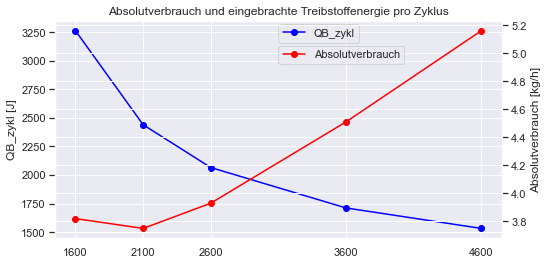

In [15]:
def QB_zykl(rpm,Hu=41):
    '''
    params:
        rpm: 1/min
        Hu [MJ/kg]
    returns:
        QB/Zykl [J]
    '''
    dm = df[df["Drehzahl"]==rpm]["Absolutverbrauch"].unique()[0] #kg/h
    return dm/60 * 10**6 * Hu * 1/rpm * 2 #kg/min * J/kg * min/1

df_zykl = pd.DataFrame({"Drehzahl":RPMs,"Absolutverbrauch":df["Absolutverbrauch"].unique(),"QB_zykl":[QB_zykl(rpm) for rpm in RPMs]})
display(df_zykl)

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(df_zykl["Drehzahl"],df_zykl["QB_zykl"],"-o",label="QB_zykl",color="blue")
ax1.legend(loc=(0.5,0.9))
ax1.set_xticks(RPMs)
ax2 = ax1.twinx()
ax2.plot(df_zykl["Drehzahl"],df_zykl["Absolutverbrauch"],"-o",label="Absolutverbrauch",color="red")
ax2.legend(loc=(0.5,0.8))
plt.title("Absolutverbrauch und eingebrachte Treibstoffenergie pro Zyklus")
ax1.set_ylabel("QB_zykl [J]")
ax2.set_ylabel("Absolutverbrauch [kg/h]")

plt.show()

#### Indizierte Arbeit $W_i/Zykl$ 
Die indizierte Arbeit pro Zyklus (-360° - 360°) ergibt sich bei drei Zylindern näherungsweise zu:
$$
W_i/Zykl = \sum_{Zyl=1}^3 W_{i,Zyl} = \sum_{Zyl=1}^3  \int p \, dv \approx 3*p_{mi}*V_h
$$

,Drehzahl,Absolutverbrauch,QB_zykl,Wi_zykl
0,1600,3.82,3262.916667,1146.202689
1,2100,3.75,2440.476190,927.820086
2,2600,3.93,2065.769231,810.511539
3,3600,4.51,1712.129630,673.995689
4,4600,5.16,1533.043478,621.455466


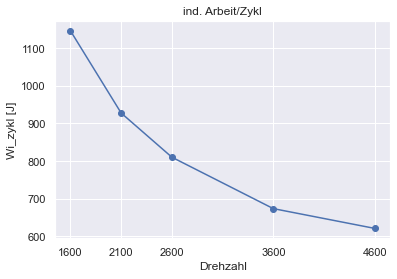

In [16]:
df_zykl["Wi_zykl"] = 3*0.1*df_pm["pmi"]*Vh*10**(-3) #N/mm² * mm³ -> Nm == J

plt.plot(df_zykl["Drehzahl"],df_zykl["Wi_zykl"],"-o")
plt.title("ind. Arbeit/Zykl")
plt.ylabel("Wi_zykl [J]")
plt.xlabel("Drehzahl")
plt.xticks(RPMs)

display(df_zykl)
plt.show()

#### Effektive Arbeit $W_e/Zykl$
Die effektive Arbeit pro Zyklus ergibt sich mit drei Zylindern zu:
$$
W_e/Zykl = 3*p_{me}*V_h
$$

In [17]:
df_zykl["We_zykl"] = 3*0.1*df_pm["pme"]*Vh*10**(-3) #N/mm² * mm³ -> Nm == J
df_zykl

,Drehzahl,Absolutverbrauch,QB_zykl,Wi_zykl,We_zykl
0,1600,3.82,3262.916667,1146.202689,1013.352126
1,2100,3.75,2440.476190,927.820086,772.454802
2,2600,3.93,2065.769231,810.511539,624.297292
3,3600,4.51,1712.129630,673.995689,450.127395
4,4600,5.16,1533.043478,621.455466,351.732713


### Temperaturverlauf und Heizverlauf
Zunächst erfolgt die Bestimmung der Ladungsmasse $m$ aus der idealen Gasgleichung unter der Annahme $\phi = -120°$ und $T=380K$: <br>
$$
p*V = m*R*T \rightarrow m' = \frac{p(-120°)*V(-120°)}{R*380K}
$$
Mit $m'$ folgt daraus für die Temperatur eines Messpunkts $i$:
$$
T_i = \frac{p_i*V_i}{m'*R} \\
\text{...mit } R=287\frac{J}{kgK}
$$
Die so ermittelte Temperatur $T_i$ benötigt man zur Berechnung von $c_v$ bzw. $\kappa = \kappa(c_v)$ im differentiellen Heizverlauf $dQ_H$ zwischen zwei Messungen $i$ und $j$:
$$
dQ_{H,ij} = \frac{c_{v,j}*V_j*(p_j - \bar{p_j})}{R} \\
c_{v,j} = 0,7 + 0,255*T_j*10^{-3} \text{...mit } [c_v]=\frac{kJ}{kgK}\\
\bar{p_j} = p_i \bigg(\frac{V_i}{V_j}\bigg)^{\kappa} \\
\kappa = 1+ \frac{0,2888}{c_{v,j}}
$$
#### Temperaturverlauf
Zunächst folgt die Berechnung des Temperaturverlaufs:

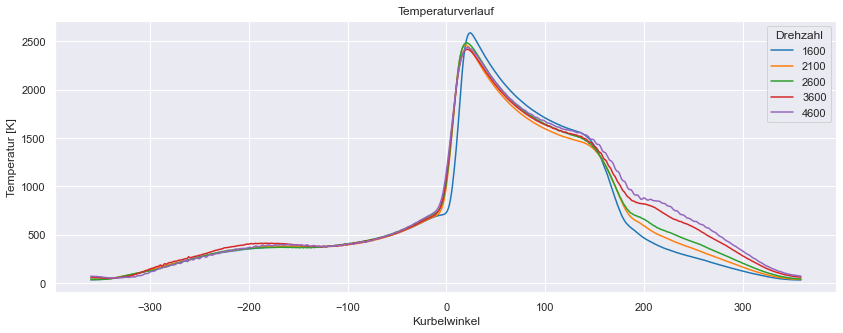

In [18]:
#Masse berechnen
def mass(rpm):
    df_rpm = df[df["Drehzahl"]==rpm]
    p = df_rpm[df_rpm["Kurbelwinkel"]==-120].loc[:,"P_ZYLm"].values[0] #bar
    V = df_rpm[df_rpm["Kurbelwinkel"]==-120].loc[:,"Volumen"].values[0] #mm³
    m = p*0.1 * V * 10**(-3) / (287*380) #(N/mm² * mm³)*10**(-3) -> Nm / J/kgK * K -> J/kg --> kg
    return m #kg
for rpm in RPMs:
    df.loc[df["Drehzahl"]==rpm,"m"] = mass(rpm)
    
#Temperatur berechnen
df["T"] = (df["P_ZYLm"]*0.1*df["Volumen"]*10**(-3))/(df["m"]*287) #K

#cv berechnen
df["cv"] = 0.7+0.255*df["T"]*10**(-3)

#kappa berechnen
df["kappa"] = 1+(0.2888/df["cv"])

#p2' berechnen: shifting p1 and v1 for one row p' = p_shift(v_shift/v)**kappa
for rpm in RPMs:
    df.loc[df["Drehzahl"]==rpm,"P_ZYLm_shift"] = df.loc[df["Drehzahl"]==rpm,"P_ZYLm"].shift(1)
    df.loc[df["Drehzahl"]==rpm,"Volumen_shift"] = df.loc[df["Drehzahl"]==rpm,"Volumen"].shift(1)

df["p'"] = df["P_ZYLm_shift"] * (df["Volumen_shift"]/df["Volumen"])**df["kappa"] #bar

#dQH berechnen: dQH = cv * V * (p-p')/R
df["dQH"] = df["cv"]*1000 * df["Volumen"] * 10**(-9) * (df["P_ZYLm"]-df["p'"]) * 10**(5) / 287

#Temperaturverlauf plotten
fig, ax = plt.subplots(figsize=(14,5))

sns.lineplot(data=df,x="Kurbelwinkel",y="T",hue="Drehzahl",palette="tab10",ax=ax)
ax.set_title("Temperaturverlauf")
ax.set_ylabel("Temperatur [K]")

plt.show()

#### Gemessener Heizverlauf $dQ_H$

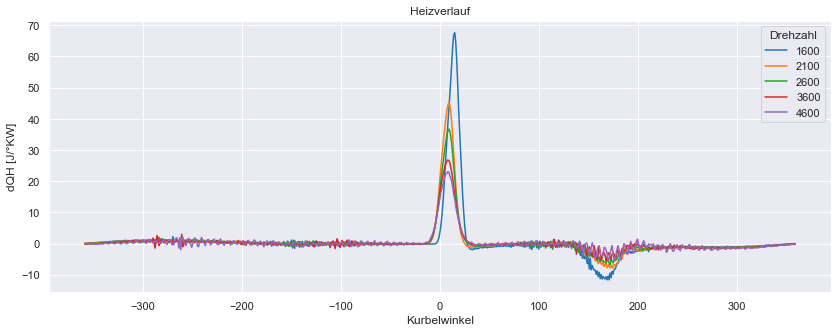

In [19]:
#Heizverlauf
fig, ax = plt.subplots(figsize=(14,5))
sns.lineplot(data=df,x="Kurbelwinkel",y="dQH",hue="Drehzahl",palette="tab10")
ax.set_title("Heizverlauf")
ax.set_ylabel("dQH [J/°KW]")
plt.show()

TODO: Deutung Senke zw. 100 und 100°

#### Idealisierter Heizverlauf $dQ_H$
Der idealisierte Heizberlauf $dQ_{H,ideal}$ folgt der Annahme, dass $dQ_H$ im Intervall -360°KW ~ ZZP konstant null und nach ZZP nach unten von der Nulllinie beschränkt ist ist.

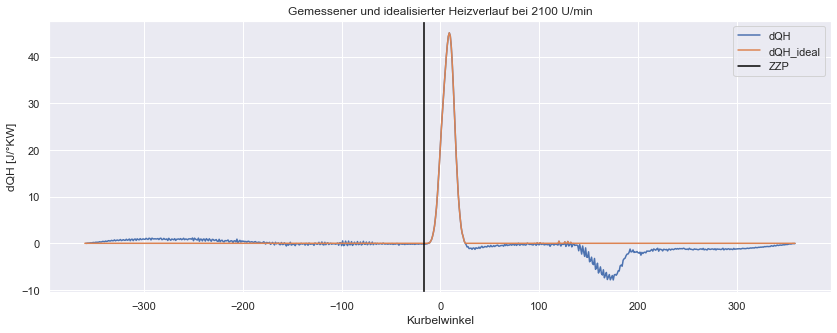

In [20]:
df.loc[:,"dQH_ideal"] = df["dQH"]

mask = (df["Kurbelwinkel"] < df["ZZP"]) | ((df["Kurbelwinkel"]> df["ZZP"]) & (df["dQH"] < 0))
df.loc[mask,"dQH_ideal"] = 0

fig,ax = plt.subplots(figsize=(14,5))
df[df["Drehzahl"]==2100].plot(x="Kurbelwinkel",y=["dQH","dQH_ideal"],ax=ax)
ZZP(2100,over="angle",ax=ax,vline=True,color="black")
ax.set_ylabel("dQH [J/°KW]")
ax.set_title(f"Gemessener und idealisierter Heizverlauf bei {2100} U/min")
plt.legend()
plt.show()

#### Gemessener integrierter Heizverlauf $Q_H$

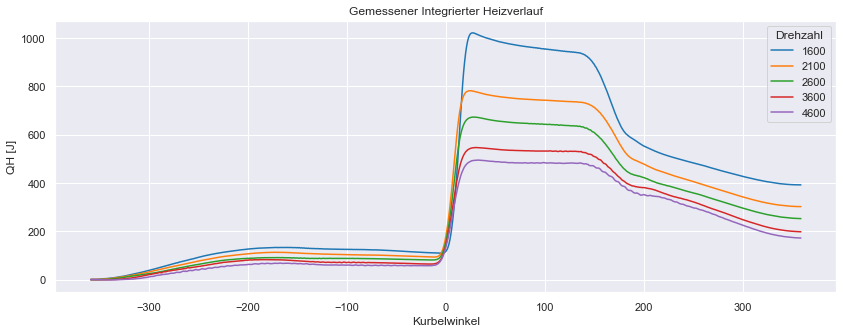

In [21]:
for rpm in RPMs:
    df.loc[df["Drehzahl"]==rpm,"QH"] = df.loc[df["Drehzahl"]==rpm,"dQH"].expanding(1).sum()

fig, ax = plt.subplots(figsize=(14,5))
sns.lineplot(data=df,x="Kurbelwinkel",y="QH",hue="Drehzahl",palette="tab10")
ax.set_title("Gemessener Integrierter Heizverlauf")
ax.set_ylabel("QH [J]")

plt.show()

Der berechnete interierte Heizverlauf $Q_H$ weicht stark vom idealisierten Bild einer klaren S-Kurve ab. Im Breich -360° bis ZZP liegt $Q_H$ bereits deutlich über der Nulllinie. Das bedeutet dass der Heizverlauf $dQ_H$ hier im Mittel positiv ist. <br>
Nach Erreichen eines Maximums bleibt $Q_H$ zunächst auf einem Plateau bevor es durch die Senke von $dQ_H$ im Bereich 100°KW - 200°KW einen Abfall erfährt. <br>
Idealerweise nähert sich $Q_H$ asymptotisch seinem Maximum.
#### Idealisierter integrierte Heizverlauf $Q_H$
Der idealisierte integrierte Heizverlauf folgt aus dem idealisierten Heizverlauf $dQ_H$:

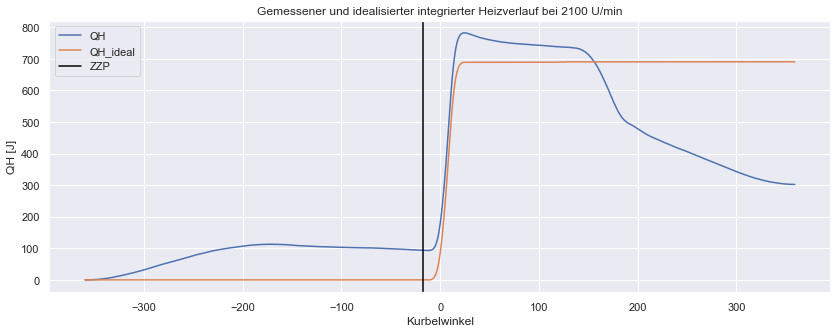

In [22]:
for rpm in RPMs:
    df.loc[df["Drehzahl"]==rpm,"QH_ideal"] = df.loc[df["Drehzahl"]==rpm,"dQH_ideal"].expanding(1).sum()
    
fig,ax = plt.subplots(figsize=(14,5))
df[df["Drehzahl"]==2100].plot(x="Kurbelwinkel",y=["QH","QH_ideal"],ax=ax)
ZZP(2100,over="angle",ax=ax,vline=True,color="black")
ax.set_ylabel("QH [J]")
ax.set_title(f"Gemessener und idealisierter integrierter Heizverlauf bei {2100} U/min")
plt.legend()
plt.show()

#### Wandwärmeverlust $Q_W/Zykl$
Der Wandwärmeverlust ergibt sich zu:
$$
Q_H = Q_B - Q_W \rightarrow Q_W = Q_B - Q_H
$$
Für drei Zylinder folgt daraus:
$$
Q_H/Zykl = 3*Q_H
$$
Da der integrierte Heizverlauf aufgrund des abfallenden Mittels des Heizverlaufes $dQ_H < 0$ ab ~100°KW stark abfällt wird idealisiert mit dem Maximum des berechneten $QH_{max}$ fortgefahren.

,Drehzahl,Absolutverbrauch,QB_zykl,Wi_zykl,We_zykl,QH_max,QH_max_ideal,QH_zykl,QH_zykl_ideal,QW_zykl,QW_zykl_ideal
0,1600,3.82,3262.916667,1146.202689,1013.352126,1021.724659,918.266330,3065.173977,2754.798990,197.742690,508.117677
1,2100,3.75,2440.476190,927.820086,772.454802,781.998933,690.360151,2345.996800,2071.080454,94.479390,369.395736
2,2600,3.93,2065.769231,810.511539,624.297292,672.881103,600.653731,2018.643310,1801.961193,47.125921,263.808038
3,3600,4.51,1712.129630,673.995689,450.127395,546.678001,492.194538,1640.034004,1476.583614,72.095625,235.546016
4,4600,5.16,1533.043478,621.455466,351.732713,494.759034,457.490775,1484.277102,1372.472326,48.766376,160.571152


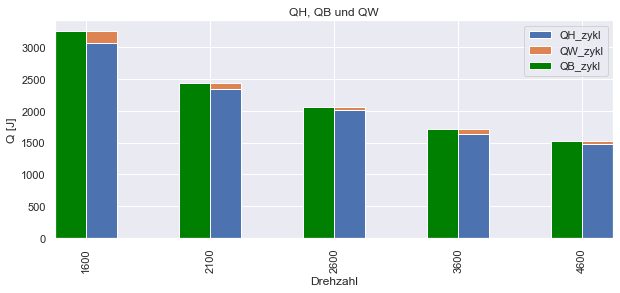

In [23]:
df_zykl["QH_max"] = df.groupby(by="Drehzahl",as_index=False).max().loc[:,"QH"]
df_zykl["QH_max_ideal"] = df.groupby(by="Drehzahl",as_index=False).max().loc[:,"QH_ideal"]

df_zykl["QH_zykl"] = df_zykl["QH_max"]*3
df_zykl["QH_zykl_ideal"] = df_zykl["QH_max_ideal"]*3

df_zykl["QW_zykl"] = df_zykl["QB_zykl"] - df_zykl["QH_zykl"]
df_zykl["QW_zykl_ideal"] = df_zykl["QB_zykl"] - df_zykl["QH_zykl_ideal"]

fix, ax = plt.subplots(figsize=(10,4))
bars1 = df_zykl.plot(kind="bar",x="Drehzahl",y=["QH_zykl","QW_zykl"],stacked=True,ax=ax,align="edge",width=0.25)
bars2 = df_zykl.plot(kind="bar",x="Drehzahl",y="QB_zykl",ax=ax,width=-0.25,align="edge",color="green")
ax.set_xlim(left=ax.get_xlim()[0],right=ax.get_xlim()[1]+0.25)
ax.set_title("QH, QB und QW")
ax.set_ylabel("Q [J]")

display(df_zykl)
plt.show()

### Berechneter Druck-, Heiz- und integrierter Heizverlauf

In [35]:
def verlauf(rpm,xlim=(-360,360),ideal=False,ax=None,umsatz=False):
    '''
    Plottet Druck und Heizverläufe
    params:
        rpm:
        xlim:
        ideal: bool: True für ideale Heizverläufe; False für aus Messung berechnete.
        ax:
        verbr: bool: True für Einfügen von 5, 50, 95 Umsatzpunkt
    '''
    df_rpm = df[df["Drehzahl"]==rpm]
    if not ax:
        fig,ax = plt.subplots(figsize=(14,8))
        
    x = df_rpm["Kurbelwinkel"]
    ax.plot(x,df_rpm["P_ZYLm"],label="Druckverlauf",color="blue")
    ax.tick_params(axis='y', colors='blue')
    ZZP(rpm,ax=ax,over="angle",color="black")
    ax.legend(loc=(0.05,0.9))
    ax.set_ylabel("Druckverlauf [bar]")
    ax.set_xlabel("Kurbelwinkel [°]")
    
    attr = "idealisierter" if ideal else "gemessener"
    
    ax.set_title(f"{attr} Druck- und Heizverlauf bei {rpm} U/min")
    
    if ideal:
        y1 = df_rpm["dQH_ideal"]
        y2 = df_rpm["QH_ideal"]
    else:
        y1 = df_rpm["dQH"]
        y2 = df_rpm["QH"]
    
    ax1 = ax.twinx()
    ax1.plot(x,y1*10,label="dQH skaliert",color="red") #skaliert mit faktor 10
    ax1.tick_params(axis='y', colors='red')
    ax1.plot(x,y2,label="QH",color="green")
    ax1.tick_params(axis='y', colors='green')
    ax1.set_ylabel("QH [J], dQH skaliert [0.1J/°KW]")
    
    if umsatz:
        for pkt in [5,50,95]:
            x,y = umsatzpunkt(rpm,pkt,ideal=ideal)
            ax1.scatter(x,y,label=f"{pkt}% Punkt",marker="o")
    ax1.legend(loc=(0.8,0.7))   
    
    #align zero line
    ax_ylims = ax.axes.get_ylim()           # Find y-axis limits set by the plotter
    ax_yratio = ax_ylims[0] / ax_ylims[1]  # Calculate ratio of lowest limit to highest limit

    ax1_ylims = ax1.axes.get_ylim()           # Find y-axis limits set by the plotter
    ax1_yratio = ax1_ylims[0] / ax1_ylims[1]
    
    if ax_yratio < ax1_yratio: 
        ax1.set_ylim(bottom = ax1_ylims[1]*ax_yratio)
    else:
        ax.set_ylim(bottom = ax_ylims[1]*ax1_yratio)
        
    #kurbelwinkel range
    plt.xlim(left=xlim[0],right=xlim[1])
    
    return
    
rpm_dropd2 = widgets.Dropdown(options=RPMs,value=2600)
xlim_slider = widgets.IntRangeSlider(value=[-50,100],min=-360,max=360,continuous_update=False,description="Kurbelwinkel")
plot4 = interactive_output(verlauf,{"rpm":rpm_dropd2,"xlim":xlim_slider,"ideal":fixed(False)})
display(rpm_dropd2,xlim_slider,plot4)

Dropdown(index=2, options=(1600, 2100, 2600, 3600, 4600), value=2600)

IntRangeSlider(value=(-50, 100), continuous_update=False, description='Kurbelwinkel', max=360, min=-360)

Output()

### Verbrennungsparameter
***Verbrennungschwerpunkt, 5% und 95% Umsatzpunkt*** <br>
Der Verbrennungsschwerpunkt beschreibt den Punkt (Kurbelwinkel), bei dem 50% der Gesamtenergie ausgegangen vom integrierten Heizverlauf $Q_H$ umgesetzt ist. <br>
Da der berechnete integrierte Heizverlauf von einer idealen S-Kurve abweicht, die sich dem Endwert (=Maximum) asymptotisch nähert, wird für die Bestimmung der Energieumsatzpunkte als fiktiver Endwert das Maximum von $Q_H$ verwendet. <br>
Der Verbrennungsschwerpunkt wird also ermittelt, indem der Punkt $i$ identifiziert wird, bei dem gilt:
$$
Q_{Hi} = 0.5 * Q_{Hmax} \rightarrow \phi_i = VSP
$$
Analoges gilt für den 5%- und 95%-Umsatzpunkt. <br>
<br>
***Zündverzug*** <br>
Der zündverzug eribt sich aus der Differenz von 5%-Umsatzpunkt und ZZP.
$$
ZVZ = \phi_{5} - ZZP
$$
<br>
***Brenndauer*** <br>
Die Brenndauer ergibt sich analog aus der Differenz von 95%- und 5%-Umsatzpunkt.
$$
BD = \phi_{95} - \phi_{5}
$$

In [25]:
def umsatzpunkt(rpm,pkt,ideal=False):
    '''
    params:
        rpm: Drehzhl
        pkt: Umsatzpunkt in %, e.g. one of int 5, 50, 95
    returns:
        Koordinaten des Umsatzpunktes (x,y) x: Kurbelwinkel [°KW], y: QH [J]
    '''
    
    if ideal:
        QH_max = df_zykl.loc[df_zykl["Drehzahl"]==rpm,"QH_max_ideal"].values[0]
        upkt = df.loc[(df["Drehzahl"]==rpm) & (df["QH_ideal"] >= 0.01*pkt*QH_max),["Kurbelwinkel","QH_ideal"]].iloc[0,:]

    else:
        QH_max = df_zykl.loc[df_zykl["Drehzahl"]==rpm,"QH_max"].values[0]
        upkt = df.loc[(df["Drehzahl"]==rpm) & (df["QH"] >= 0.01*pkt*QH_max),["Kurbelwinkel","QH"]].iloc[0,:]
    
    return tuple(upkt)

#Umsatzpunkte °KW in Tabelle schreiben
for upkt in [5,50,95]:
    df_zykl[f"UP{upkt}"] = [umsatzpunkt(rpm,upkt,ideal=False)[0] for rpm in RPMs]
    df_zykl[f"UP{upkt}_ideal"] = [umsatzpunkt(rpm,upkt,ideal=True)[0] for rpm in RPMs]

# ZZP in Tabelle sschreiben
df_zykl["ZZP"] = df.groupby(by="Drehzahl",as_index=False).mean().loc[:,"ZZP"]

#Zündverzug ZVZ
df_zykl["ZVZ"] = df_zykl["UP5"] - df_zykl["ZZP"]
df_zykl["ZVZ_ideal"] = df_zykl["UP5_ideal"] - df_zykl["ZZP"]

#Brenndauer BD
df_zykl["BD"] = df_zykl["UP95"] - df_zykl["UP5"]
df_zykl["BD_ideal"] = df_zykl["UP95_ideal"] - df_zykl["UP5_ideal"]


display(df_zykl)

,Drehzahl,Absolutverbrauch,QB_zykl,Wi_zykl,We_zykl,QH_max,QH_max_ideal,QH_zykl,QH_zykl_ideal,QW_zykl,...,UP5_ideal,UP50,UP50_ideal,UP95,UP95_ideal,ZZP,ZVZ,ZVZ_ideal,BD,BD_ideal
0,1600,3.82,3262.916667,1146.202689,1013.352126,1021.724659,918.266330,3065.173977,2754.798990,197.742690,...,4.0,13.0,14.0,22.0,22.0,-8.0,-280.0,12.0,310.0,18.0
1,2100,3.75,2440.476190,927.820086,772.454802,781.998933,690.360151,2345.996800,2071.080454,94.479390,...,-2.0,7.0,8.0,17.0,17.0,-17.0,-275.0,15.0,309.0,19.0
2,2600,3.93,2065.769231,810.511539,624.297292,672.881103,600.653731,2018.643310,1801.961193,47.125921,...,-3.0,7.0,8.0,18.0,20.0,-19.0,-268.0,16.0,305.0,23.0
3,3600,4.51,1712.129630,673.995689,450.127395,546.678001,492.194538,1640.034004,1476.583614,72.095625,...,-4.0,6.0,8.0,19.0,21.0,-22.0,-268.0,18.0,309.0,25.0
4,4600,5.16,1533.043478,621.455466,351.732713,494.759034,457.490775,1484.277102,1372.472326,48.766376,...,-4.0,6.0,8.0,20.0,27.0,-24.0,-255.0,20.0,299.0,31.0


### Vergleich: Ideale und gemessene Verbrennungskennwerte 
Im Folgenden werden aus idealisierte Brennparameter mit denen aus der Messung gewonnenen Parametern verglichen.
#### 5%-, 50%- und 95%-Umsatzpunkte
Der aus den Messdaten gewonnene 5%-Umsatzpunkt liegt bei allen Drehzahlen bei ca. -280°KW. Die aus dem idealisierten und gemessenen Heizverlauf gewonnen Umsatzpunkte sind im Folgenden dargestellt.

In [26]:
ideal_radio = widgets.RadioButtons(options=[("Ideal",True),("Gemessen",False)])

plot5 = interactive_output(verlauf,{"rpm":rpm_dropd,"ideal":ideal_radio,"umsatz":fixed(True),"xlim":fixed((-30,50))})
display(rpm_dropd, ideal_radio, plot5)

Dropdown(description='Drehzahl', index=1, options=(1600, 2100, 2600, 3600, 4600), value=2100)

RadioButtons(options=(('Ideal', True), ('Gemessen', False)), value=True)

Output()

#### Brennbeginn, -dauer und -ende

In [27]:
df_zykl

,Drehzahl,Absolutverbrauch,QB_zykl,Wi_zykl,We_zykl,QH_max,QH_max_ideal,QH_zykl,QH_zykl_ideal,QW_zykl,...,UP5_ideal,UP50,UP50_ideal,UP95,UP95_ideal,ZZP,ZVZ,ZVZ_ideal,BD,BD_ideal
0,1600,3.82,3262.916667,1146.202689,1013.352126,1021.724659,918.266330,3065.173977,2754.798990,197.742690,...,4.0,13.0,14.0,22.0,22.0,-8.0,-280.0,12.0,310.0,18.0
1,2100,3.75,2440.476190,927.820086,772.454802,781.998933,690.360151,2345.996800,2071.080454,94.479390,...,-2.0,7.0,8.0,17.0,17.0,-17.0,-275.0,15.0,309.0,19.0
2,2600,3.93,2065.769231,810.511539,624.297292,672.881103,600.653731,2018.643310,1801.961193,47.125921,...,-3.0,7.0,8.0,18.0,20.0,-19.0,-268.0,16.0,305.0,23.0
3,3600,4.51,1712.129630,673.995689,450.127395,546.678001,492.194538,1640.034004,1476.583614,72.095625,...,-4.0,6.0,8.0,19.0,21.0,-22.0,-268.0,18.0,309.0,25.0
4,4600,5.16,1533.043478,621.455466,351.732713,494.759034,457.490775,1484.277102,1372.472326,48.766376,...,-4.0,6.0,8.0,20.0,27.0,-24.0,-255.0,20.0,299.0,31.0


NameError: name 'df_' is not defined

### Wirkungsgrade

### Ergebnistabelle

In [ ]:
#Zusammenfassung aller Ergebnisse in Ergebnistabelle -> Korrelationsanalyse
#zB weitere Größen:  Verbrauch-Drehzahl,ZZP-Drehzahl (ZZP wandert nach vorne)
#mergen von df_pm und df_zykl mit excel-drehzahltabelle

### Korrelationsanalyse